In [1]:
root_dir = "/mnt/data/cdens/casanovo-scaling/prospect_data/"
data_dir = f"{root_dir}non-tryptic_data/"

In [2]:
def post_process(meta_df, filename, filter_HCD=True, min_andromeda=80):
    if filter_HCD:
        meta_df = meta_df[meta_df["fragmentation"] == "HCD"]
    if min_andromeda is not None:
        meta_df = meta_df[meta_df["andromeda_score"] >= min_andromeda]
    if len(meta_df) != meta_df[['scan_number', 'raw_file']].drop_duplicates().shape[0]:
        meta_df = meta_df.loc[meta_df.groupby(['raw_file', 'scan_number'])['andromeda_score'].idxmax()]
    meta_df['source_dir'] = filename[:-18]
    return meta_df


def remove_ptms(seq):
    seq = seq.replace("[UNIMOD:", "")
    return "".join([c for c in seq if "A" <= c <= "Z"])

In [3]:
import pandas as pd
import os

meta_dfs = []
for f in os.listdir(data_dir):
    if f.endswith("_meta_data.parquet"):
        print(f"Doing {f}")
        md_df = pd.read_parquet(os.path.join(data_dir, f), engine='fastparquet')
        meta_dfs.append(post_process(md_df, f, min_andromeda=80))

meta_df = pd.concat(meta_dfs)
meta_df


Doing TMT_TUM_lysn_meta_data.parquet
Doing TUM_aspn_meta_data.parquet
Doing TMT_TUM_HLA_meta_data.parquet
Doing TUM_lysn_meta_data.parquet
Doing TMT_TUM_aspn_meta_data.parquet
Doing TUM_HLA_meta_data.parquet
Doing TUM_HLA2_meta_data.parquet


,raw_file,scan_number,modified_sequence,precursor_charge,precursor_intensity,mz,precursor_mz,fragmentation,mass_analyzer,retention_time,indexed_retention_time,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,source_dir
6,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,22378,[UNIMOD:737]-K[UNIMOD:737]AQAEQEEQERLQ,3,302295700.0,682.37244,682.372905,HCD,FTMS,19.642,21.063125,250.050,13,1624767.75,1.135248e+08,35.0,37.763320,TMT_TUM_lysn
11,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,50268,[UNIMOD:737]-K[UNIMOD:737]LEVLESQLSEGSQ,2,145803300.0,1003.06450,1003.065584,HCD,FTMS,39.908,72.879741,236.300,14,3246215.75,4.953800e+07,30.0,32.763320,TMT_TUM_lysn
15,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,65501,[UNIMOD:737]-VDTFLDGFSVK[UNIMOD:737],2,29856510.0,843.47936,843.983001,HCD,FTMS,51.792,103.265050,229.680,11,1799249.50,4.375753e+07,35.0,37.763320,TMT_TUM_lysn
17,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,22339,[UNIMOD:737]-K[UNIMOD:737]AQAEQEEQERLQ,3,185462400.0,682.37244,682.373206,HCD,FTMS,19.611,20.983863,227.920,13,1278321.75,7.565260e+07,35.0,37.763320,TMT_TUM_lysn
21,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,61217,[UNIMOD:737]-K[UNIMOD:737]VAIPLLSIQNGEQ,2,16044230.0,984.59833,984.601303,HCD,FTMS,48.124,93.886616,225.090,14,1142016.50,1.653821e+07,30.0,32.763320,TMT_TUM_lysn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275573,03036a_BF2-TUM_HLA2_158_01_01-DDA-1h-R1,68559,LPLHVATLLTGLLEC[UNIMOD:4],2,806412.7,825.46838,825.472702,HCD,FTMS,59.192,115.194877,85.554,15,NaN,NaN,28.0,30.207451,TUM_HLA2
6275138,03036a_BF2-TUM_HLA2_158_01_01-DDA-1h-R1,68987,KPLPGIIMGGILPFGC[UNIMOD:4],2,1592102.0,835.46205,835.466909,HCD,FTMS,59.522,116.020413,103.760,16,NaN,NaN,28.0,30.207451,TUM_HLA2
6275342,03036a_BF2-TUM_HLA2_158_01_01-DDA-1h-R1,69139,KPLPGIIMGGILPFGC[UNIMOD:4],2,25974560.0,835.46205,835.466408,HCD,FTMS,59.640,116.315605,94.781,16,NaN,NaN,28.0,30.207451,TUM_HLA2
6275685,03036a_BF2-TUM_HLA2_158_01_01-DDA-1h-R1,69310,KPLPGIIMGGILPFGC[UNIMOD:4],2,1227371.0,835.46205,835.466609,HCD,FTMS,59.775,116.653325,80.960,16,NaN,NaN,28.0,30.207451,TUM_HLA2


In [6]:
print(len(meta_df))
print(len(meta_df['modified_sequence'].unique()))

13344410
484892


In [4]:
meta_df['unmodified_sequence'] = meta_df['modified_sequence'].apply(remove_ptms)
meta_df

,raw_file,scan_number,modified_sequence,precursor_charge,precursor_intensity,mz,precursor_mz,fragmentation,mass_analyzer,retention_time,indexed_retention_time,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,source_dir,unmodified_sequence
6,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,22378,[UNIMOD:737]-K[UNIMOD:737]AQAEQEEQERLQ,3,302295700.0,682.37244,682.372905,HCD,FTMS,19.642,21.063125,250.050,13,1624767.75,1.135248e+08,35.0,37.763320,TMT_TUM_lysn,KAQAEQEEQERLQ
11,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,50268,[UNIMOD:737]-K[UNIMOD:737]LEVLESQLSEGSQ,2,145803300.0,1003.06450,1003.065584,HCD,FTMS,39.908,72.879741,236.300,14,3246215.75,4.953800e+07,30.0,32.763320,TMT_TUM_lysn,KLEVLESQLSEGSQ
15,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,65501,[UNIMOD:737]-VDTFLDGFSVK[UNIMOD:737],2,29856510.0,843.47936,843.983001,HCD,FTMS,51.792,103.265050,229.680,11,1799249.50,4.375753e+07,35.0,37.763320,TMT_TUM_lysn,VDTFLDGFSVK
17,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,22339,[UNIMOD:737]-K[UNIMOD:737]AQAEQEEQERLQ,3,185462400.0,682.37244,682.373206,HCD,FTMS,19.611,20.983863,227.920,13,1278321.75,7.565260e+07,35.0,37.763320,TMT_TUM_lysn,KAQAEQEEQERLQ
21,03922_GA1-TMT_TUM_lysn_1_01_01-TMT1-1h-R1,61217,[UNIMOD:737]-K[UNIMOD:737]VAIPLLSIQNGEQ,2,16044230.0,984.59833,984.601303,HCD,FTMS,48.124,93.886616,225.090,14,1142016.50,1.653821e+07,30.0,32.763320,TMT_TUM_lysn,KVAIPLLSIQNGEQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275573,03036a_BF2-TUM_HLA2_158_01_01-DDA-1h-R1,68559,LPLHVATLLTGLLEC[UNIMOD:4],2,806412.7,825.46838,825.472702,HCD,FTMS,59.192,115.194877,85.554,15,NaN,NaN,28.0,30.207451,TUM_HLA2,LPLHVATLLTGLLEC
6275138,03036a_BF2-TUM_HLA2_158_01_01-DDA-1h-R1,68987,KPLPGIIMGGILPFGC[UNIMOD:4],2,1592102.0,835.46205,835.466909,HCD,FTMS,59.522,116.020413,103.760,16,NaN,NaN,28.0,30.207451,TUM_HLA2,KPLPGIIMGGILPFGC
6275342,03036a_BF2-TUM_HLA2_158_01_01-DDA-1h-R1,69139,KPLPGIIMGGILPFGC[UNIMOD:4],2,25974560.0,835.46205,835.466408,HCD,FTMS,59.640,116.315605,94.781,16,NaN,NaN,28.0,30.207451,TUM_HLA2,KPLPGIIMGGILPFGC
6275685,03036a_BF2-TUM_HLA2_158_01_01-DDA-1h-R1,69310,KPLPGIIMGGILPFGC[UNIMOD:4],2,1227371.0,835.46205,835.466609,HCD,FTMS,59.775,116.653325,80.960,16,NaN,NaN,28.0,30.207451,TUM_HLA2,KPLPGIIMGGILPFGC


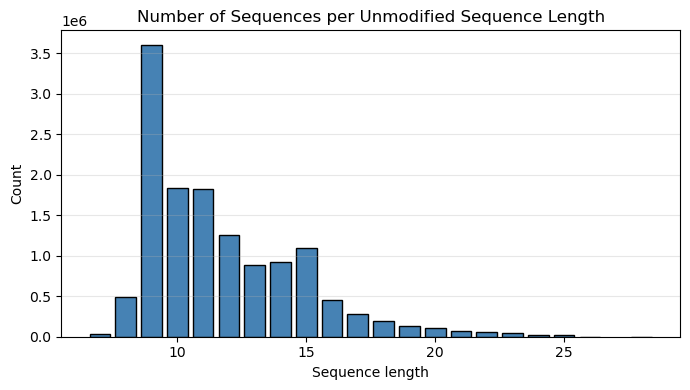

In [13]:
import matplotlib.pyplot as plt

# Count occurrences of each length
length_counts = meta_df["peptide_length"].value_counts().sort_index()

# Plot as a bar chart
plt.figure(figsize=(7, 4))
plt.bar(length_counts.index, length_counts.values, color="steelblue", edgecolor="black")

plt.title("Number of Sequences per Unmodified Sequence Length")
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

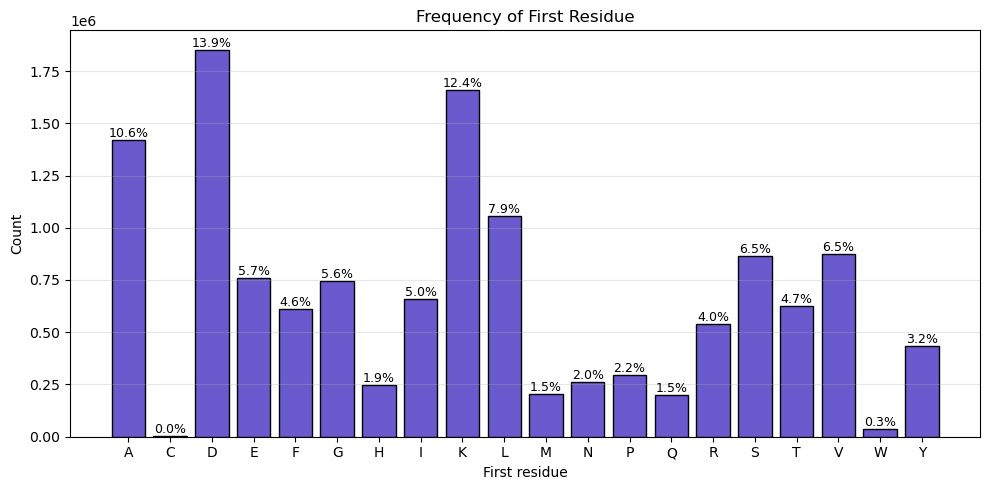

In [6]:
# Count how often each residue appears
first_res_counts = meta_df["unmodified_sequence"].dropna().str[0].value_counts().sort_index()

total = first_res_counts.sum()
percentages = 100 * first_res_counts / total

# Plot as a bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(first_res_counts.index, first_res_counts.values, color="slateblue", edgecolor="black")

# Annotate bars with percentages
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=9, rotation=0)

plt.title("Frequency of First Residue")
plt.xlabel("First residue")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

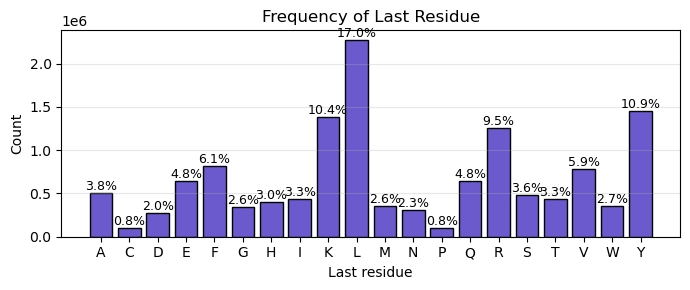

In [14]:
# Count how often each residue appears
last_res_counts = meta_df["unmodified_sequence"].dropna().str[-1].value_counts().sort_index()

total = last_res_counts.sum()
percentages = 100 * last_res_counts / total

# Plot as a bar chart
plt.figure(figsize=(7, 3))
bars = plt.bar(first_res_counts.index, last_res_counts.values, color="slateblue", edgecolor="black")

# Annotate bars with percentages
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=9, rotation=0)

plt.title("Frequency of Last Residue")
plt.xlabel("Last residue")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# SOME PTM STATS
extracted = []
for seq, unmod_seq in zip(meta_df["modified_sequence"], meta_df["unmodified_sequence"]):
    matches = re.findall(r'([A-Z]?)\[UNIMOD:(\d+)\]-?', seq)

    if not matches or seq == unmod_seq:  # either no PTM or identical to unmodified
        extracted.append(("unmodified", ""))
        continue

    # get unique (residue, ptm) pairs for this sequence
    unique_pairs = set()
    for residue, ptm in matches:
        if residue == "":
            residue = "N-term"
        unique_pairs.add((residue, ptm))

    extracted.extend(unique_pairs)

mod_count = Counter(extracted)
print(mod_count)

Counter({('unmodified', ''): 8945864, ('N-term', '737'): 2673753, ('M', '35'): 1585915, ('K', '737'): 1160260, ('C', '4'): 436255})


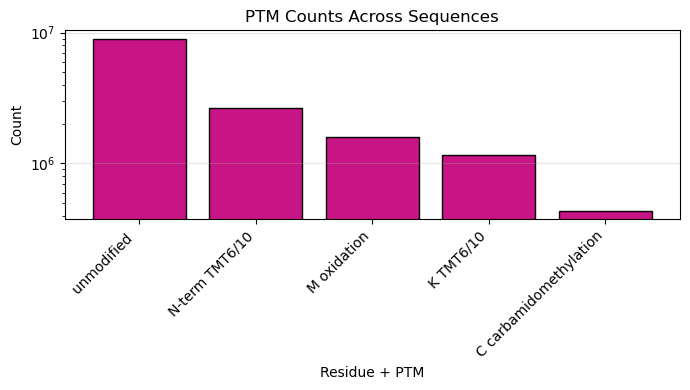

In [16]:
ptm_dict = {
    # '+0.984': 'deamidation',
    '4': 'carbamidomethylation',
    '35': 'oxidation',
    # '+42.011': 'acetylation',
    # '+43.006': 'carbamylation',
    # '-17.027': 'ammonia loss',
    '737': 'TMT6/10',
    # '+79.966': 'phosphorylation',
    # '+28.031': 'dimethylation',
    # '+10.008': 'Silac 13C6-15N4',
    # '+8.014': 'Silac 13C6-15N2',
    # '+34.063': 'dimethylation 2H4-13C2',
    # '+114.043': 'ubiquitinylation',
    # '+229.163+42.011': 'TMT6/10 + acetylation',
    # '+229.163+43.006': 'TMT6/10 + carbamylation',
    # '+229.163-17.027': 'TMT6/10 + ammonia loss',
    # '+34.063-17.027': 'dimethylation 2H4-13C2 + ammonia loss',
}

# Convert mod_count to use readable PTM names
mod_count_named = Counter()
for (residue, ptm), count in mod_count.items():
    ptm_name = ptm_dict.get(ptm, ptm)  # fallback to original if not in dict
    mod_count_named[(residue, ptm_name)] = count

# Convert Counter to lists for plotting
labels, counts = zip(*mod_count_named.items())
labels = [f"{residue} {ptm}" for residue, ptm in labels]  # e.g., "N deamidation"

# Optional: sort by count descending
counts, labels = zip(*sorted(zip(counts, labels), reverse=True))

plt.figure(figsize=(7, 4))
plt.bar(labels, counts, color="mediumvioletred", edgecolor="black")
plt.yscale("log")  # optional: useful if counts vary widely
plt.xticks(rotation=45, ha="right")
plt.xlabel("Residue + PTM")
plt.ylabel("Count")
plt.title("PTM Counts Across Sequences")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()